In [1]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os
import shutil
import matplotlib.pyplot as plt

In [2]:
BASE_DIR = './drive/MyDrive/Minor Project'

In [3]:
covid = pd.read_excel(os.path.join(BASE_DIR, 'COVID.metadata.xlsx'))
covid.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [4]:
normal = pd.read_excel(os.path.join(BASE_DIR, 'Normal.metadata.xlsx'))
normal.head()

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [5]:
covid['Result'] = 'Positive'
normal['Result'] = 'Negative'

In [6]:
covid = covid[['FILE NAME', 'Result']]
normal = normal[['FILE NAME', 'Result']]

In [7]:
data = pd.concat([covid, normal], axis=0).reset_index(drop = True)
data.head()
data = shuffle(data)
data.head()

,FILE NAME,Result
1858,COVID-1859,Positive
11167,NORMAL-7552,Negative
6328,NORMAL-2713,Negative
1953,COVID-1954,Positive
1113,COVID-1114,Positive


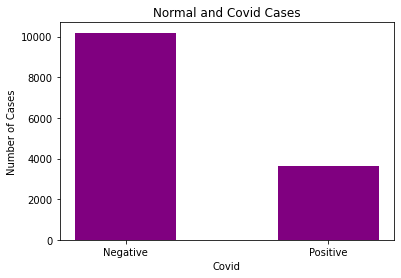

In [8]:
counter = dict(data['Result'].value_counts())
plt.bar(counter.keys(), counter.values(), color='purple', width=0.5)
plt.xlabel('Covid')
plt.ylabel('Number of Cases')
plt.title('Normal and Covid Cases')
plt.show()

In [9]:
train_data, test_val_data = train_test_split(data, test_size=0.25, stratify=data['Result'])
test_data, val_data = train_test_split(test_val_data, test_size=0.4, stratify=test_val_data['Result'])
print(f"Training Data: -\n{train_data['Result'].value_counts()}")
print(f"Validation Data: -\n{val_data['Result'].value_counts()}")
print(f"Testing Data: -\n{test_data['Result'].value_counts()}")

Training Data: -
Negative    7644
Positive    2712
Name: Result, dtype: int64
Validation Data: -
Negative    1019
Positive     362
Name: Result, dtype: int64
Testing Data: -
Negative    1529
Positive     542
Name: Result, dtype: int64


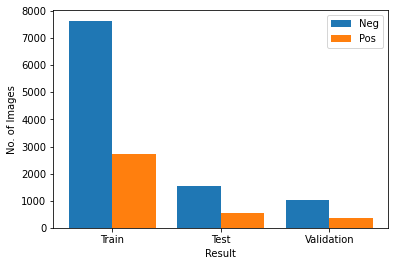

In [20]:
import numpy as np

X = ['Train', 'Test', 'Validation']
y_covid = [len(train_data[train_data['Result']=='Positive']), len(test_data[test_data['Result']=='Positive']), len(val_data[val_data['Result']=='Positive'])]
y_normal = [len(train_data[train_data['Result']=='Negative']), len(test_data[test_data['Result']=='Negative']), len(val_data[val_data['Result']=='Negative'])]
X_axis = np.arange(len(X))
plt.bar(X_axis-0.2, y_normal, 0.4, label='Neg')
plt.bar(X_axis+0.2, y_covid, 0.4, label='Pos')
plt.xticks(X_axis, X)
plt.ylabel('No. of Images')
plt.xlabel('Result')
plt.legend()
plt.show()

In [10]:
# Dataset
    # train
        # Covid
        # Normal
    # test
        # Covid
        # Normal
    # Validation
        # Covid
        # Normal

ROOT_DIR =  os.path.join(BASE_DIR, 'Dataset')
os.mkdir(ROOT_DIR)

TRAIN_DIR = os.path.join(ROOT_DIR, 'train')
TEST_DIR = os.path.join(ROOT_DIR, 'test')
VAL_DIR = os.path.join(ROOT_DIR, 'Validation')

os.mkdir(TRAIN_DIR)
os.mkdir(TEST_DIR)
os.mkdir(VAL_DIR)

TRAIN_COVID = os.path.join(TRAIN_DIR, 'COVID')
TRAIN_NORMAL = os.path.join(TRAIN_DIR, 'Normal')
TEST_COVID = os.path.join(TEST_DIR, 'COVID')
TEST_NORMAL = os.path.join(TEST_DIR, 'Normal')
VAL_COVID = os.path.join(VAL_DIR, 'COVID')
VAL_NORMAL = os.path.join(VAL_DIR, 'Normal')

os.mkdir(TRAIN_COVID)
os.mkdir(TRAIN_NORMAL)
os.mkdir(TEST_COVID)
os.mkdir(TEST_NORMAL)
os.mkdir(VAL_COVID)
os.mkdir(VAL_NORMAL)

print('Root Directory: ', os.listdir(ROOT_DIR))
print('Train Directory:', os.listdir(TRAIN_DIR))
print('Test Directory: ', os.listdir(TEST_DIR))
print('VAlidation Directory: ', os.listdir(VAL_DIR))

FileExistsError: ignored

In [ ]:
for i, row in train_data.iterrows():
    label = filename = ''
    if row['Result']=='Positive':
      filename = row[0].upper() + '.png'
      label = 'COVID'
    else:
      filename = row[0].capitalize() + '.png'
      label = 'Normal'
    src = os.path.join(BASE_DIR, label, 'images', filename)
    dst = os.path.join(TRAIN_DIR, label, filename)
    shutil.copyfile(src, dst)

for i, row in test_data.iterrows():
    label = filename = ''
    if row['Result']=='Positive':
      filename = row[0].upper() + '.png'
      label = 'COVID'
    else:
      filename = row[0].capitalize() + '.png'
      label = 'Normal'
    src = os.path.join(BASE_DIR, label, 'images', filename)
    dst = os.path.join(TEST_DIR, label, filename)
    shutil.copyfile(src, dst)

for i, row in val_data.iterrows():
    label = filename = ''
    if row['Result']=='Positive':
      filename = row[0].upper() + '.png'
      label = 'COVID'
    else:
      filename = row[0].capitalize() + '.png'
      label = 'Normal'
    src = os.path.join(BASE_DIR, label, 'images', filename)
    dst = os.path.join(VAL_DIR, label, filename)
    shutil.copyfile(src, dst)